## Credit Risk Modeling

In [ ]:
import pandas as pd
import numpy as np
import sys
sys.tracebacklimit = 0 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from scipy import stats 


## Data Cleaning

In [85]:
df = pd.read_csv('accepted.csv')

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/1686102350.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted.csv')


In [86]:
keep_cols = [
    # Loan info
    "loan_amnt", "term", "int_rate", "installment", "purpose",
    
    # Borrower demographics
    "emp_length", "home_ownership", "annual_inc", "verification_status",
    
    # Credit history
    "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", 
    "pub_rec", "revol_bal", "revol_util", "total_acc", "earliest_cr_line",
    
    # Lender grade
    "grade", "sub_grade",
    
    # Target
    "loan_status"
]

df_model = df[keep_cols].copy()
df_model = df_model.rename(columns={"annual_inc": "annual_income", "total_acc": "total_accounts", "sub_grade": "sub_grade_level", "int_rate": "interest_rate", "loan_amnt": "loan_amount", "loan_status": "loan_outcome", 
                              "emp_length": "employment_length", "delinq_2yrs": "delinquent_2yrs", "inq_last_6mths": "inquiries_last_6mths", "open_acc": "open_accounts", "pub_rec": "public_records", "revol_bal": "revolving_balance", 
                              "revol_util": "revolving_utilization", "earliest_cr_line": "earliest_credit_line", "grade": "grade_level", "term": "loan_term", "installment": "monthly_installment", 
                              "dti": "debt_to_income_ratio", "purpose": "loan_purpose", "home_ownership": "home_ownership_status", "verification_status": "income_verification_status"})

df_model.head(30)

,loan_amount,loan_term,interest_rate,monthly_installment,loan_purpose,employment_length,home_ownership_status,annual_income,income_verification_status,debt_to_income_ratio,...,inquiries_last_6mths,open_accounts,public_records,revolving_balance,revolving_utilization,total_accounts,earliest_credit_line,grade_level,sub_grade_level,loan_outcome
0,3600.0,36 months,13.99,123.03,debt_consolidation,10+ years,MORTGAGE,55000.0,Not Verified,5.91,...,1.0,7.0,0.0,2765.0,29.7,13.0,Aug-2003,C,C4,Fully Paid
1,24700.0,36 months,11.99,820.28,small_business,10+ years,MORTGAGE,65000.0,Not Verified,16.06,...,4.0,22.0,0.0,21470.0,19.2,38.0,Dec-1999,C,C1,Fully Paid
2,20000.0,60 months,10.78,432.66,home_improvement,10+ years,MORTGAGE,63000.0,Not Verified,10.78,...,0.0,6.0,0.0,7869.0,56.2,18.0,Aug-2000,B,B4,Fully Paid
3,35000.0,60 months,14.85,829.90,debt_consolidation,10+ years,MORTGAGE,110000.0,Source Verified,17.06,...,0.0,13.0,0.0,7802.0,11.6,17.0,Sep-2008,C,C5,Current
4,10400.0,60 months,22.45,289.91,major_purchase,3 years,MORTGAGE,104433.0,Source Verified,25.37,...,3.0,12.0,0.0,21929.0,64.5,35.0,Jun-1998,F,F1,Fully Paid
5,11950.0,36 months,13.44,405.18,debt_consolidation,4 years,RENT,34000.0,Source Verified,10.20,...,0.0,5.0,0.0,8822.0,68.4,6.0,Oct-1987,C,C3,Fully Paid
6,20000.0,36 months,9.17,637.58,debt_consolidation,10+ years,MORTGAGE,180000.0,Not Verified,14.67,...,0.0,12.0,0.0,87329.0,84.5,27.0,Jun-1990,B,B2,Fully Paid
7,20000.0,36 months,8.49,631.26,major_purchase,10+ years,MORTGAGE,85000.0,Not Verified,17.61,...,0.0,8.0,0.0,826.0,5.7,15.0,Feb-1999,B,B1,Fully Paid
8,10000.0,36 months,6.49,306.45,credit_card,6 years,RENT,85000.0,Not Verified,13.07,...,1.0,14.0,1.0,10464.0,34.5,23.0,Apr-2002,A,A2,Fully Paid
9,8000.0,36 months,11.48,263.74,credit_card,10+ years,MORTGAGE,42000.0,Not Verified,34.80,...,0.0,8.0,0.0,7034.0,39.1,18.0,Nov-1994,B,B5,Fully Paid


In [87]:
df_model.dtypes.sort_values()


loan_amount                   float64
total_accounts                float64
revolving_utilization         float64
revolving_balance             float64
public_records                float64
open_accounts                 float64
inquiries_last_6mths          float64
debt_to_income_ratio          float64
delinquent_2yrs               float64
annual_income                 float64
monthly_installment           float64
interest_rate                 float64
sub_grade_level                object
home_ownership_status          object
employment_length              object
loan_purpose                   object
loan_term                      object
earliest_credit_line           object
grade_level                    object
income_verification_status     object
loan_outcome                   object
dtype: object

In [88]:
df_model['loan_outcome'].value_counts()

loan_outcome
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [89]:
print(df_model.describe().T)

                           count          mean            std     min  \
loan_amount            2260668.0  15046.931228    9190.245488  500.00   
interest_rate          2260668.0     13.092829       4.832138    5.31   
monthly_installment    2260668.0    445.806823     267.173535    4.93   
annual_income          2260664.0  77992.428687  112696.199574    0.00   
debt_to_income_ratio   2258957.0     18.824196      14.183329   -1.00   
delinquent_2yrs        2260639.0      0.306879       0.867230    0.00   
inquiries_last_6mths   2260638.0      0.576835       0.885963    0.00   
open_accounts          2260639.0     11.612402       5.640861    0.00   
public_records         2260639.0      0.197528       0.570515    0.00   
revolving_balance      2260668.0  16658.458078   22948.305028    0.00   
revolving_utilization  2258866.0     50.337696      24.713073    0.00   
total_accounts         2260639.0     24.162552      11.987528    1.00   

                            25%       50%       75

In [90]:
df_model["loan_outcome"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [91]:
df_model.isnull().sum()

loan_amount                       33
loan_term                         33
interest_rate                     33
monthly_installment               33
loan_purpose                      33
employment_length             146940
home_ownership_status             33
annual_income                     37
income_verification_status        33
debt_to_income_ratio            1744
delinquent_2yrs                   62
inquiries_last_6mths              63
open_accounts                     62
public_records                    62
revolving_balance                 33
revolving_utilization           1835
total_accounts                    62
earliest_credit_line              62
grade_level                       33
sub_grade_level                   33
loan_outcome                      33
dtype: int64

### Clean up in data values

In [92]:
# chatgpt suggested imputation for employment length
# Convert to numeric
# flag missing values for imputation so a new column is created that indicates 
df_model["employment_length"] = (
    df_model["employment_length"]
    .replace({"10+ years": "10", "< 1 year": "0"})
    .str.extract(r"(\d+)")
    .astype(float)
)

# Missingness flag
df_model["emp_length_missing"] = df_model["employment_length"].isna().astype(int)

# Impute numeric value (median is standard)
df_model["employment_length"] = (
    df_model["employment_length"]
    .fillna(df_model["employment_length"].median())
)

In [93]:
df_model = df_model.dropna(subset=["loan_term"])
df_model["loan_term"] = (
    df_model["loan_term"]
    .str.replace(" months", "", regex=False)
    .astype("Int64")
)

In [94]:

dt = pd.to_datetime(df_model["earliest_credit_line"], format="%b-%Y", errors="coerce")
credit_years = ((pd.Timestamp.today() - dt).dt.days / 365.25)
df_model["credit_history_years"] = np.floor(credit_years).astype("Float64")  
df_model["credit_history_years"] = df_model["credit_history_years"].astype("Int64")  
df_model = df_model.drop(columns=["earliest_credit_line"])

In [95]:
cat_cols = [
    "loan_outcome",
    "home_ownership_status",
    "loan_purpose",
    "grade_level",
    "sub_grade_level",
    "income_verification_status"
]

df_model[cat_cols] = df_model[cat_cols].astype("category")

### Target Outcome cleaning

Since there are 3 outcomes: charged off, 

### Dropping any row that doesn't have a value for the target

I have decided to completely drop any row with an "NA" in loan outcome because the response variable must be fully observed in a supervised credit risk model. If a loan does not have an observed outcome (one of the three: fully paid, current, or charged off) it cannont be used to model training or evaluation.

In [96]:
df_model = df_model.dropna(subset=["loan_outcome"])

Now we will get rid of any row that is current - does not help us understand our end goal of whether or not a line will be charged off or fully paid. There is a new category that will be determine by a 1 if the individual defaulted.

In [97]:
final_map = {
    "Fully Paid": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0,
    "Does not meet the credit policy. Status: Fully Paid": 0,  # sometimes spacing differs

    "Charged Off": 1,
    "Default": 1,
    "Does not meet the credit policy. Status:Charged Off": 1,
    "Does not meet the credit policy. Status: Charged Off": 1
}

# Create binary target via mapping
df_model["default"] = df_model["loan_outcome"].map(final_map)

# Keep only rows that mapped (i.e., final outcomes)
df_model = df_model.dropna(subset=["default"]).copy()
df_model["default"] = df_model["default"].astype(int)

In [98]:
df_model.head(30)

,loan_amount,loan_term,interest_rate,monthly_installment,loan_purpose,employment_length,home_ownership_status,annual_income,income_verification_status,debt_to_income_ratio,...,public_records,revolving_balance,revolving_utilization,total_accounts,grade_level,sub_grade_level,loan_outcome,emp_length_missing,credit_history_years,default
0,3600.0,36,13.99,123.03,debt_consolidation,10.0,MORTGAGE,55000.0,Not Verified,5.91,...,0.0,2765.0,29.7,13.0,C,C4,Fully Paid,0,22,0
1,24700.0,36,11.99,820.28,small_business,10.0,MORTGAGE,65000.0,Not Verified,16.06,...,0.0,21470.0,19.2,38.0,C,C1,Fully Paid,0,26,0
2,20000.0,60,10.78,432.66,home_improvement,10.0,MORTGAGE,63000.0,Not Verified,10.78,...,0.0,7869.0,56.2,18.0,B,B4,Fully Paid,0,25,0
4,10400.0,60,22.45,289.91,major_purchase,3.0,MORTGAGE,104433.0,Source Verified,25.37,...,0.0,21929.0,64.5,35.0,F,F1,Fully Paid,0,27,0
5,11950.0,36,13.44,405.18,debt_consolidation,4.0,RENT,34000.0,Source Verified,10.20,...,0.0,8822.0,68.4,6.0,C,C3,Fully Paid,0,38,0
6,20000.0,36,9.17,637.58,debt_consolidation,10.0,MORTGAGE,180000.0,Not Verified,14.67,...,0.0,87329.0,84.5,27.0,B,B2,Fully Paid,0,35,0
7,20000.0,36,8.49,631.26,major_purchase,10.0,MORTGAGE,85000.0,Not Verified,17.61,...,0.0,826.0,5.7,15.0,B,B1,Fully Paid,0,26,0
8,10000.0,36,6.49,306.45,credit_card,6.0,RENT,85000.0,Not Verified,13.07,...,1.0,10464.0,34.5,23.0,A,A2,Fully Paid,0,23,0
9,8000.0,36,11.48,263.74,credit_card,10.0,MORTGAGE,42000.0,Not Verified,34.80,...,0.0,7034.0,39.1,18.0,B,B5,Fully Paid,0,31,0
12,1400.0,36,12.88,47.10,other,3.0,MORTGAGE,64000.0,Not Verified,34.95,...,0.0,37828.0,67.2,24.0,C,C2,Fully Paid,0,29,0


## Exploratory Data Analysis (EDA)

In [99]:
numeric_cols = [
    "loan_amount",
    "loan_term",
    "interest_rate",
    "annual_income",
    "debt_to_income_ratio",
    "open_accounts",
    "total_accounts",
    "revolving_utilization",
    "credit_history_years"
]

df_model[numeric_cols].corr()

,loan_amount,loan_term,interest_rate,annual_income,debt_to_income_ratio,open_accounts,total_accounts,revolving_utilization,credit_history_years
loan_amount,1.000000,0.380793,0.141432,0.311851,0.032548,0.186504,0.209264,0.108327,0.149570
loan_term,0.380793,1.000000,0.416939,0.049977,0.059627,0.071015,0.099134,0.063777,0.035195
interest_rate,0.141432,0.416939,1.000000,-0.072114,0.146776,-0.004310,-0.042260,0.243089,-0.115874
annual_income,0.311851,0.049977,-0.072114,1.000000,-0.140279,0.135209,0.176307,0.035305,0.128322
debt_to_income_ratio,0.032548,0.059627,0.146776,-0.140279,1.000000,0.225250,0.173696,0.140933,0.021280
open_accounts,0.186504,0.071015,-0.004310,0.135209,0.225250,1.000000,0.701475,-0.140053,0.128468
total_accounts,0.209264,0.099134,-0.042260,0.176307,0.173696,0.701475,1.000000,-0.104267,0.275375
revolving_utilization,0.108327,0.063777,0.243089,0.035305,0.140933,-0.140053,-0.104267,1.000000,0.042832
credit_history_years,0.149570,0.035195,-0.115874,0.128322,0.021280,0.128468,0.275375,0.042832,1.000000


In [100]:
print(df_model["loan_purpose"].unique())


['debt_consolidation', 'small_business', 'home_improvement', 'major_purchase', 'credit_card', ..., 'medical', 'moving', 'renewable_energy', 'wedding', 'educational']
Length: 14
Categories (14, object): ['car', 'credit_card', 'debt_consolidation', 'educational', ..., 'renewable_energy', 'small_business', 'vacation', 'wedding']


In [101]:
df_model["loan_purpose"].value_counts()


loan_purpose
debt_consolidation    781442
credit_card           295625
home_improvement       87721
other                  78301
major_purchase         29550
medical                15614
small_business         15577
car                    14652
moving                  9526
vacation                9084
house                   7298
wedding                 2350
renewable_energy         936
educational              423
Name: count, dtype: int64

In [102]:
df_model.groupby("grade_level")[
    ["interest_rate", "revolving_utilization", "debt_to_income_ratio"]
].mean()

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/2009020496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_model.groupby("grade_level")[


,interest_rate,revolving_utilization,debt_to_income_ratio
grade_level,,,
A,7.113456,38.724456,15.611765
B,10.679211,50.652463,17.379720
C,14.019234,55.176805,18.908484
D,17.710482,57.906342,20.166609
E,21.106565,59.085519,20.802134
F,24.875708,60.084623,20.941394
G,27.542421,59.105071,21.452087


/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/2910300756.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("grade_level")["default"]


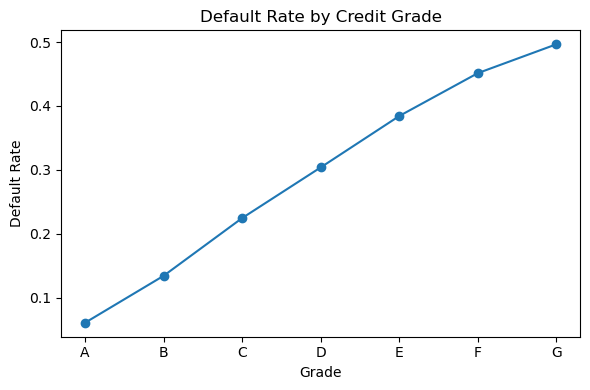

In [103]:
grade_default = (
    df_model
    .groupby("grade_level")["default"]
    .mean()
)

plt.figure(figsize=(6,4))
plt.plot(grade_default.index, grade_default.values, marker="o")
plt.xlabel("Grade")
plt.ylabel("Default Rate")
plt.title("Default Rate by Credit Grade")
plt.tight_layout()
plt.show()

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/3052874787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_ir = df_model.groupby("grade_level")["interest_rate"].mean()


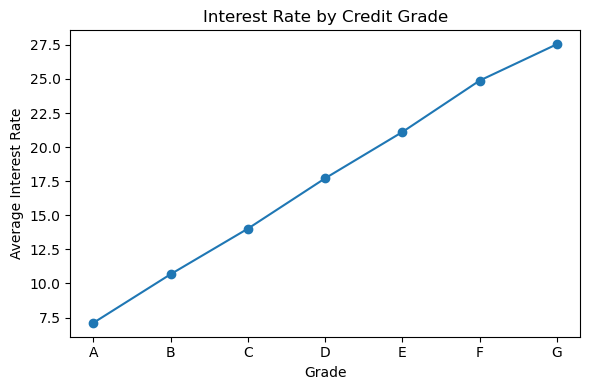

In [104]:
grade_ir = df_model.groupby("grade_level")["interest_rate"].mean()

plt.figure(figsize=(6,4))
plt.plot(grade_ir.index, grade_ir.values, marker="o")
plt.xlabel("Grade")
plt.ylabel("Average Interest Rate")
plt.title("Interest Rate by Credit Grade")
plt.tight_layout()
plt.show()

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/3271863691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_util = df_model.groupby("grade_level")["revolving_utilization"].mean()


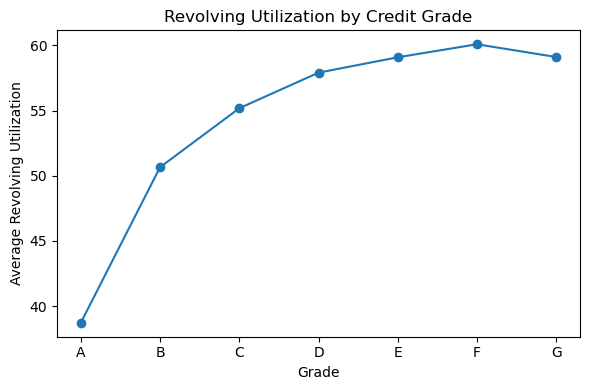

In [105]:
grade_util = df_model.groupby("grade_level")["revolving_utilization"].mean()

plt.figure(figsize=(6,4))
plt.plot(grade_util.index, grade_util.values, marker="o")
plt.xlabel("Grade")
plt.ylabel("Average Revolving Utilization")
plt.title("Revolving Utilization by Credit Grade")
plt.tight_layout()
plt.show()

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/3571739108.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_dti = df_model.groupby("grade_level")["debt_to_income_ratio"].mean()


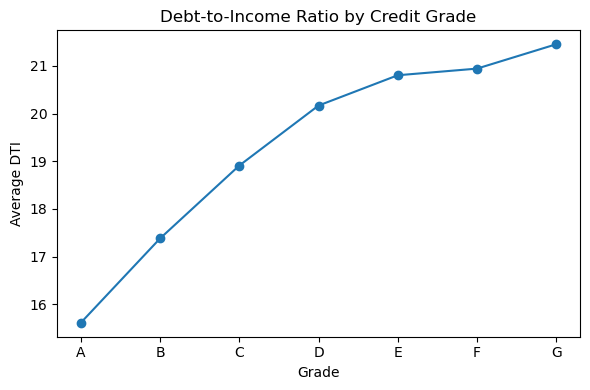

In [106]:
grade_dti = df_model.groupby("grade_level")["debt_to_income_ratio"].mean()

plt.figure(figsize=(6,4))
plt.plot(grade_dti.index, grade_dti.values, marker="o")
plt.xlabel("Grade")
plt.ylabel("Average DTI")
plt.title("Debt-to-Income Ratio by Credit Grade")
plt.tight_layout()
plt.show()

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/2156736601.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_amt = df_model.groupby("grade_level")["loan_amount"].mean()


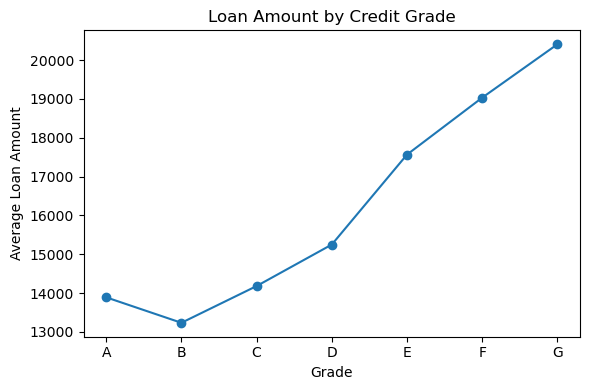

In [107]:
grade_amt = df_model.groupby("grade_level")["loan_amount"].mean()

plt.figure(figsize=(6,4))
plt.plot(grade_amt.index, grade_amt.values, marker="o")
plt.xlabel("Grade")
plt.ylabel("Average Loan Amount")
plt.title("Loan Amount by Credit Grade")
plt.tight_layout()
plt.show()

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/3603933364.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_inq = df_model.groupby("grade_level")["inquiries_last_6mths"].mean()


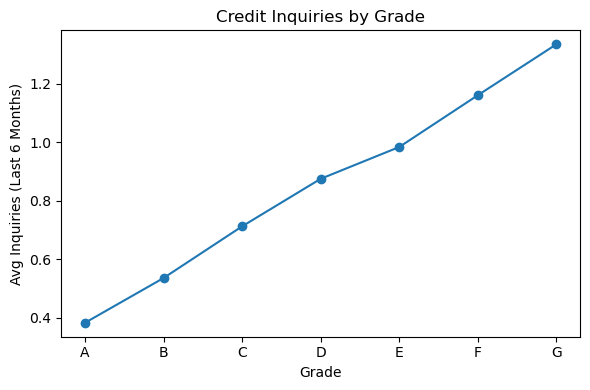

In [108]:
grade_inq = df_model.groupby("grade_level")["inquiries_last_6mths"].mean()

plt.figure(figsize=(6,4))
plt.plot(grade_inq.index, grade_inq.values, marker="o")
plt.xlabel("Grade")
plt.ylabel("Avg Inquiries (Last 6 Months)")
plt.title("Credit Inquiries by Grade")
plt.tight_layout()
plt.show()

In [109]:
df_model["installment_to_income"] = (
    df_model["monthly_installment"] * 12 / df_model["annual_income"]
)

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/642308975.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("loan_purpose")


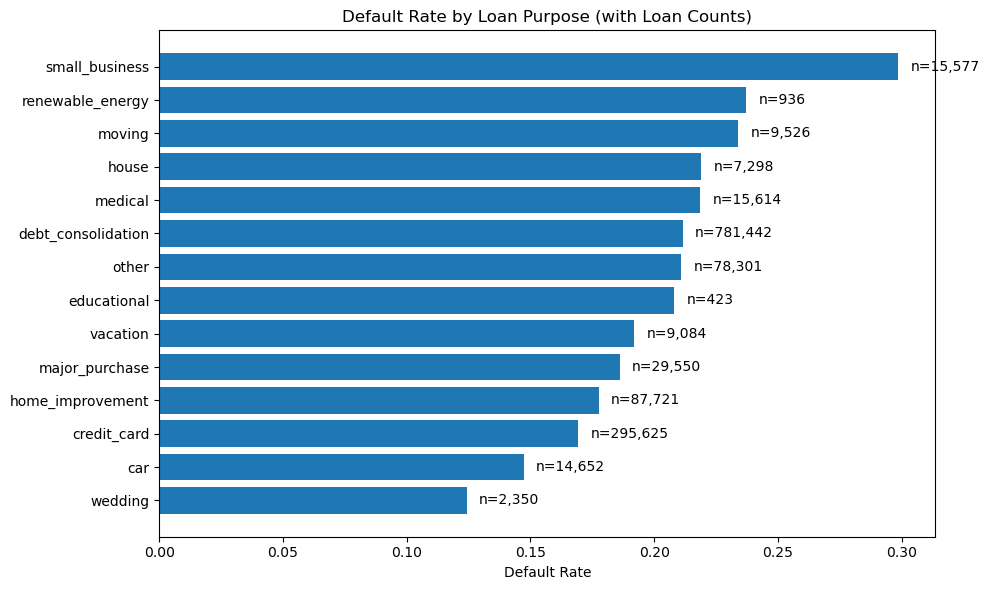

In [110]:
summary = (
    df_model
    .groupby("loan_purpose")
    .agg(
        n_loans=("default", "size"),
        default_rate=("default", "mean")
    )
    .sort_values("default_rate")
)


plt.figure(figsize=(10, 6))
plt.barh(summary.index, summary["default_rate"])
plt.xlabel("Default Rate")
plt.title("Default Rate by Loan Purpose (with Loan Counts)")

# Annotate counts
for i, (rate, n) in enumerate(zip(summary["default_rate"], summary["n_loans"])):
    plt.text(rate + 0.005, i, f"n={n:,}", va="center")

plt.tight_layout()
plt.show()

This plot shows that loans given out for small business are the most likely to default and loans given out for cars & weddings are the least likely to default. I decided to include the n values to try and decipher through noise.

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/1159902907.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("int_rate_bin")["default"]


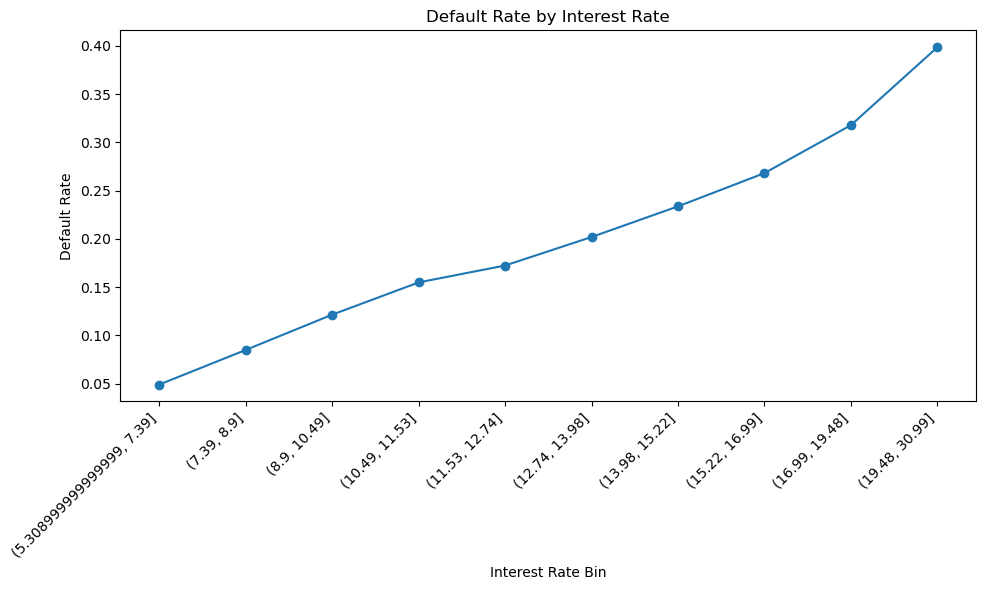

In [111]:
df_model["int_rate_bin"] = pd.qcut(df_model["interest_rate"], q=10)

# Compute default rate by bin
rate_summary = (
    df_model
    .groupby("int_rate_bin")["default"]
    .mean()
)
plt.figure(figsize=(10, 6))
plt.plot(range(len(rate_summary)), rate_summary.values, marker="o")
plt.xticks(
    ticks=range(len(rate_summary)),
    labels=[str(b) for b in rate_summary.index],
    rotation=45,
    ha="right"
)
plt.xlabel("Interest Rate Bin")
plt.ylabel("Default Rate")
plt.title("Default Rate by Interest Rate")
plt.tight_layout()
plt.show()

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/316377807.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["loan_term", "int_bin"])["default"]


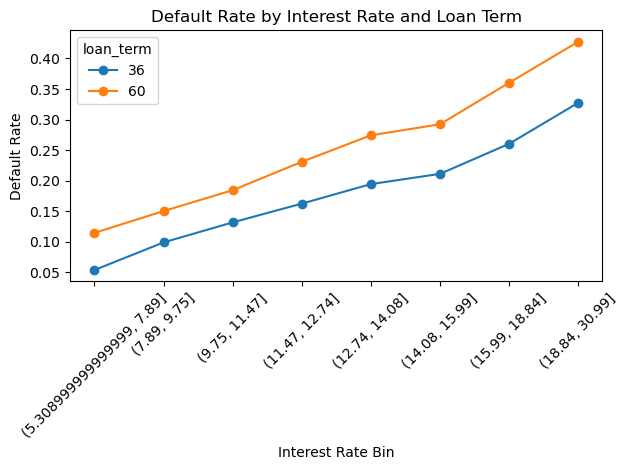

In [112]:

summary = (
    df_model
    .assign(int_bin=pd.qcut(df_model["interest_rate"], q=8))
    .groupby(["loan_term", "int_bin"])["default"]
    .mean()
    .unstack(0)
)

summary.plot(marker="o")
plt.ylabel("Default Rate")
plt.xlabel("Interest Rate Bin")
plt.title("Default Rate by Interest Rate and Loan Term")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
purpose_grade = (
    df_model
    .groupby(["loan_purpose", "grade_level"])["default"]
    .mean()
    .unstack()
)
purpose_grade

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/3250946742.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["loan_purpose", "grade_level"])["default"]


grade_level,A,B,C,D,E,F,G
loan_purpose,,,,,,,
car,0.052067,0.111579,0.186765,0.255196,0.318250,0.425926,0.500000
credit_card,0.058971,0.132151,0.230614,0.313729,0.396195,0.436421,0.475385
debt_consolidation,0.060593,0.133988,0.226502,0.311726,0.395907,0.473099,0.511180
educational,0.056818,0.187500,0.200000,0.346154,0.405405,0.454545,0.125000
home_improvement,0.053988,0.130545,0.213930,0.272952,0.345423,0.402671,0.428819
house,0.063444,0.132260,0.200224,0.289322,0.315574,0.364389,0.423387
major_purchase,0.057045,0.136607,0.210943,0.302320,0.389317,0.475262,0.467337
medical,0.080179,0.151021,0.231432,0.294954,0.328102,0.378788,0.473214
moving,0.090584,0.167208,0.210075,0.277285,0.342601,0.383372,0.487395


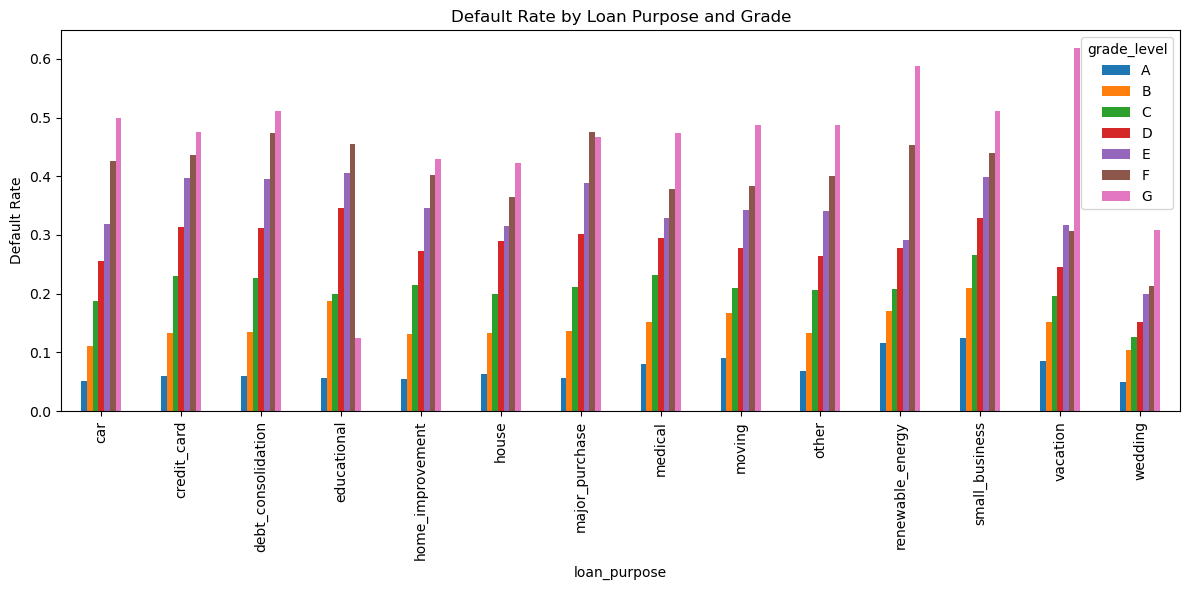

In [114]:
purpose_grade.plot(kind="bar", figsize=(12, 6))
plt.ylabel("Default Rate")
plt.title("Default Rate by Loan Purpose and Grade")
plt.tight_layout()
plt.show()

Both plots analyze default likelihood across loan purposes and credit grades. Across all purposes, default rates increase as credit grades decrease, indicating that grade level is a dominant driver of default risk.

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_74004/646106779.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["dti_bin", "util_bin"])["default"]


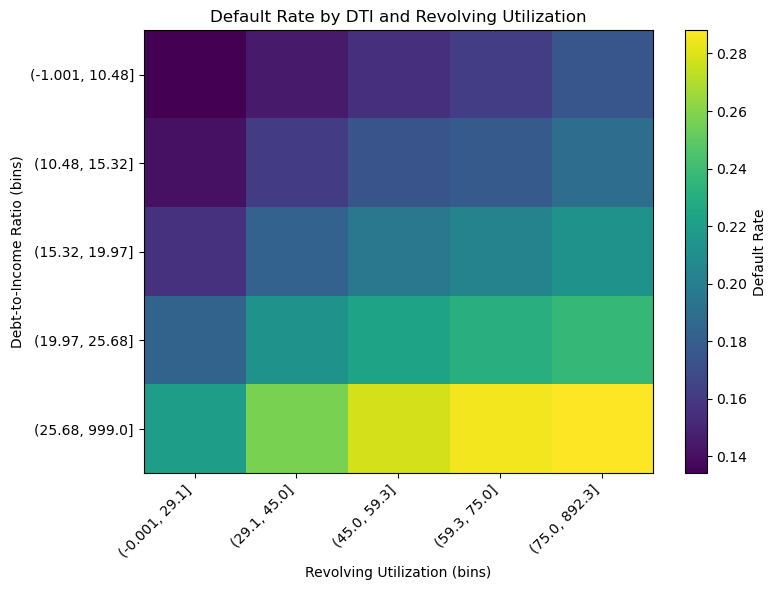

In [115]:
df_tmp = df_model.copy()
df_tmp["dti_bin"] = pd.qcut(df_tmp["debt_to_income_ratio"], 5)
df_tmp["util_bin"] = pd.qcut(df_tmp["revolving_utilization"], 5)

heat = (
    df_tmp
    .groupby(["dti_bin", "util_bin"])["default"]
    .mean()
    .unstack()
)

data = heat.values

plt.figure(figsize=(8, 6))
im = plt.imshow(data, aspect="auto")

# Axis labels
plt.xticks(
    ticks=np.arange(len(heat.columns)),
    labels=heat.columns.astype(str),
    rotation=45,
    ha="right"
)
plt.yticks(
    ticks=np.arange(len(heat.index)),
    labels=heat.index.astype(str)
)

plt.xlabel("Revolving Utilization (bins)")
plt.ylabel("Debt-to-Income Ratio (bins)")
plt.title("Default Rate by DTI and Revolving Utilization")

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label("Default Rate")

plt.tight_layout()
plt.show()


This exploration of the data shows that a high debt to income ration compounded with a high utilization rate drastically increases the probability an individual will default. This suggests that elevated utilization values oftentimes leads to a default amount of risk when borrowers are already facing high burdens of debt (high utilization).

## Train / Test Split

In [ ]:
X = df_model.drop(columns=["default", "loan_outcome"]) # all of the variables except target
y = df_model["default"] # target variable
 

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,  # I want to keep the trainng data to about 75% - since defaults are few, I want to have enough in the test therefore I chose 25%
    # instead of 20% 
    random_state=42, # this allows for reporducibility      
    stratify=y #ensures that the default rate is similar in train and test
    # helps to prevent the test set from having too few default cases           
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1011074, 23), (337025, 23), (1011074,), (337025,))

## Preprocessing

## Modeling

### Logistic Regression

### LDA

### Random Forest

### XGBOOST